In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers.shear_helpers as sh
#New Push

In [2]:
load_position = [-52, -228, -392, -568, -732, -908]
load_case2_base = [-91, -91, -67.5, -67.5, -67.5, -67.5]
load_case2 = sh.get_loads(-452)
load_case1= [-66.7]*6
max_length = 1250
reaction_locations = (25, 1225)
train_length = 960

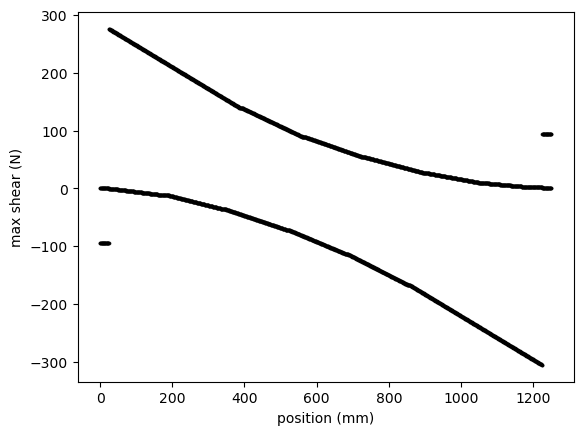

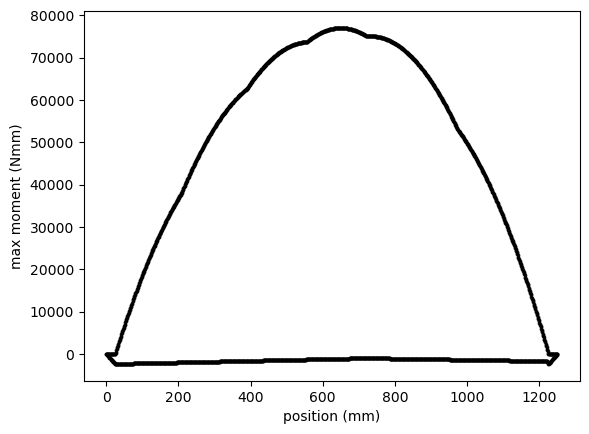

190.86401695227562
-220.83264971439104
49687.34618573751
Max Shear: -305.20598304772443
Max Moment: 77022.47907131049


In [4]:
P = load_case2
envelope_shear = sh.envelope(sh.find_shear, P, load_position, reaction_locations, max_length, train_length)
envelope_moment = sh.envelope(sh.find_moment, P, load_position, reaction_locations, max_length, train_length)
sh.plot_envelope(envelope_shear[0],envelope_shear[2],  "position (mm)", "max shear (N)", "images/shear.png")
sh.plot_envelope(envelope_moment[0],envelope_moment[2],  "position (mm)", "max moment (Nmm)", "images/moment.png")
print(envelope_shear[0][250])
print(envelope_shear[2][1000])
print(envelope_moment[0][1000])
print(f"Max Shear: {min(list(envelope_shear[2].values()))}")
print(f"Max Moment: {max(list(envelope_moment[0].values()))}")